In [1]:
using LowRankModels
using PyPlot

INFO: Loading help data...


In [6]:
## Generate synthetic data from true factorization A = x_*y_
m = 80; n = 50; k = 4

x_ = zeros(m,k)
for i = 1:m
    x_[i,rand(1:k)] = 1.0  # each row of x_ is unit-one-sparse
end
y_ = rand(-1:2:1,(n,k))'   # binary data 
A = x_ * y_;

In [7]:
function run_fit(loss_function)
    losses = fill(loss_function,n)
    rx = unitonesparse()
    ry = zeroreg()
    glrm = GLRM(A,losses,rx,ry,k)
    X,Y,ch = fit!(glrm,verbose=false)
    println("Final Objective: ",ch.objective[end])
    return X,Y,ch
end

function run_batch(loss_function;N=20)
    best = Inf
    X,Y,ch = 0,0,0
    for i = 1:N
        Xest,Yest,ch_ = run_fit(loss_function)
        if ch_.objective[end] < best
            best = ch_.objective[end]
            X,Y,ch = Xest,Yest,ch_
        end
    end
    println("Best Objective: ",ch.objective[end])
    return X,Y,ch
end

run_batch (generic function with 1 method)

In [8]:
Xlog,Ylog,ch_log = run_batch(logistic());
println("----------")
Xquad,Yquad,ch_quad = run_batch(quadratic());

Final Objective: 3270.662024651638
Final Objective: 3360.9437965860025
Final Objective: 3158.5060910307807
Final Objective: 3097.546056559843
Final Objective: 3281.1640304417597
Final Objective: 3338.101523021613
Final Objective: 3407.099543922778
Final Objective: 3213.0368590347225
Final Objective: 3138.681011081346
Final Objective: 3226.8282918304253
Final Objective: 3326.3283038353457
Final Objective: 3160.9104338204143
Final Objective: 3383.966600777079
Final Objective: 3318.3643568264065
Final Objective: 3334.908290736812
Final Objective: 3350.0247696371607
Final Objective: 3284.0059030511884
Final Objective: 3298.5948762047965
Final Objective: 3179.9439784937476
Final Objective: 3273.7454962679517
Best Objective: 3097.546056559843
----------
Final Objective: 1663.9668040784402
Final Objective: 598.5103277233521
Final Objective: 598.5091808207959
Final Objective: 902.6796709986994
Final Objective: 598.5186087267081
Final Objective: 0.0032475436373795396
Final Objective: 581.540649

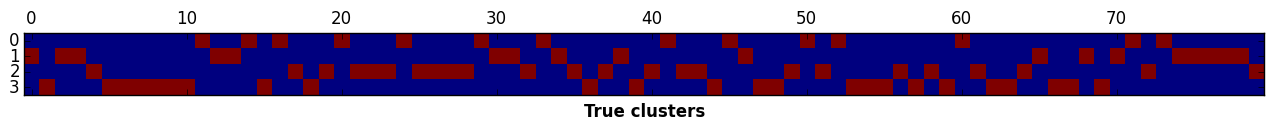

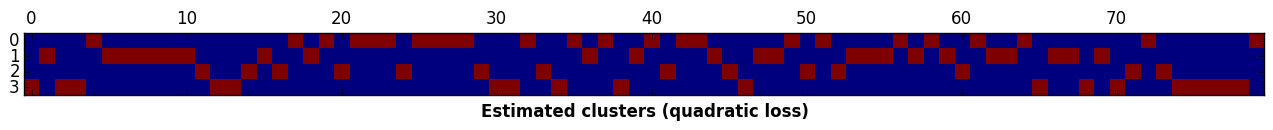

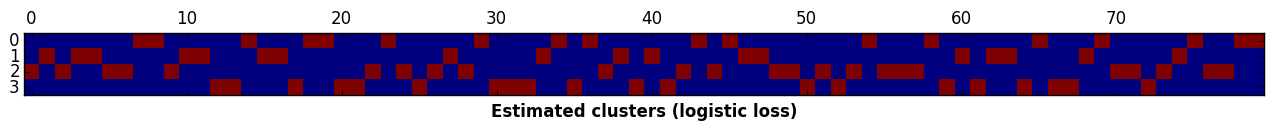

PyObject <matplotlib.text.Text object at 0x7fd34e44f790>

In [9]:
matshow(x_')
xlabel("True clusters",fontweight="bold")

matshow(Xquad')
xlabel("Estimated clusters (quadratic loss)",fontweight="bold")

matshow(Xlog')
xlabel("Estimated clusters (logistic loss)",fontweight="bold")